In [3]:
import pandas as pd
import numpy as np
import missingno
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
train_data = pd.read_csv('datasets/train.csv')
test_data = pd.read_csv('datasets/test.csv')

In [5]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


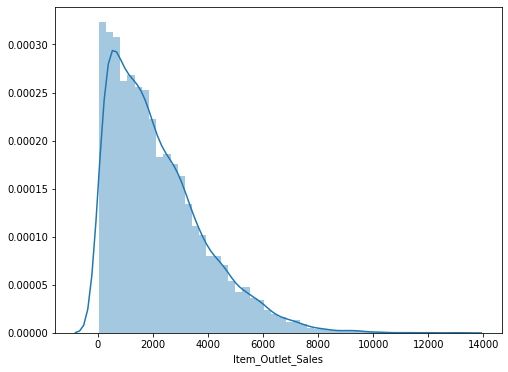

In [7]:
# distribution check for Item_Outlet_Sales
f,ax = plt.subplots(figsize = (8,6))
sns.distplot(train_data['Item_Outlet_Sales']);

In [8]:
#skewness: the longer the right tail, the more positive tail
train_data['Item_Outlet_Sales'].skew()

1.1775306028542798

In [9]:
# kurtosis: If the kurtosis value(K) is close to 3, the scatter is close to the normal distribution
# k<3 the distributions can be judged to be flattened than the noraml distribution
# K> 3 the distributioms can be considered more pointed than noraml distribution
train_data['Item_Outlet_Sales'].kurt()

1.6158766814287264

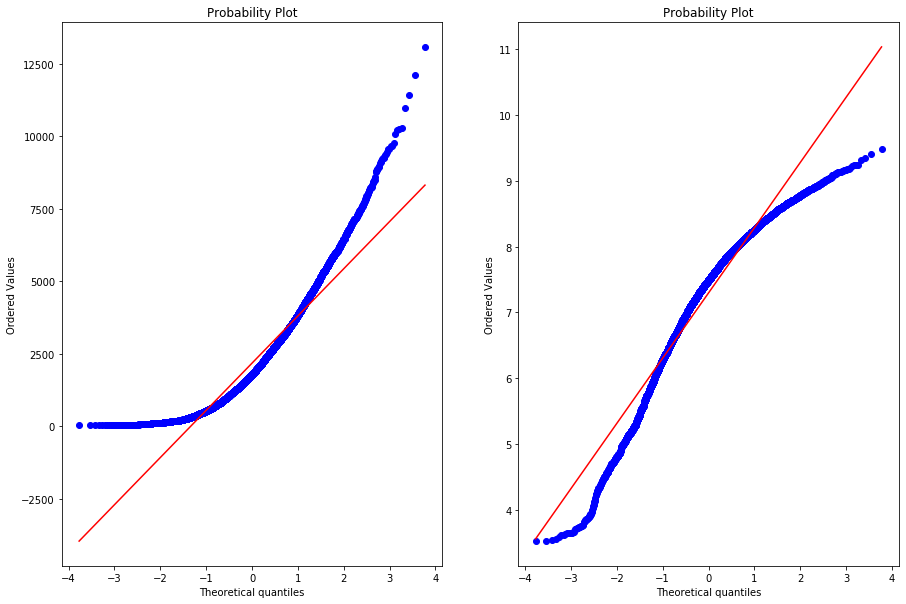

In [11]:
fig = plt.figure(figsize=(15,10))
fig.add_subplot(1,2,1)
res = stats.probplot(train_data['Item_Outlet_Sales'], plot = plt)
fig.add_subplot(1,2,2)
res = stats.probplot(np.log1p(train_data['Item_Outlet_Sales']), plot = plt)

In [12]:
train_data['Item_Outlet_Sales'] = np.log1p(train_data['Item_Outlet_Sales'])

In [13]:
train_data['Item_Outlet_Sales'].head()

0    8.225808
1    6.096776
2    7.648868
3    6.597664
4    6.903451
Name: Item_Outlet_Sales, dtype: float64

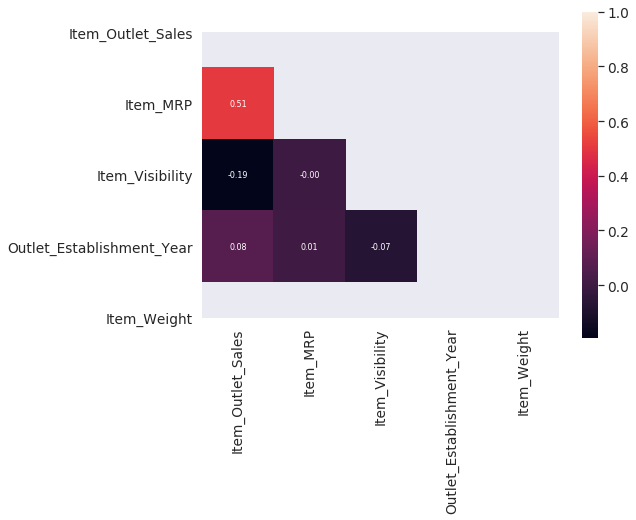

In [16]:
k = 12
corrmat = abs(train_data.corr(method="spearman"))
cols = corrmat.nlargest(k, 'Item_Outlet_Sales').index
cm = np.corrcoef(train_data[cols].values.T)
sns.set(font_scale = 1.25)
f,ax = plt.subplots(figsize = (8,6))
mask = np.zeros_like(cm)
mask[np.triu_indices_from(mask)] = True
sns.set_style("white")
hm = sns.heatmap(cm, cbar= True, annot= True, square = True, fmt=".2f", annot_kws={'size':8}, 
                 yticklabels = cols.values, xticklabels = cols.values, mask =mask)
plt.show()

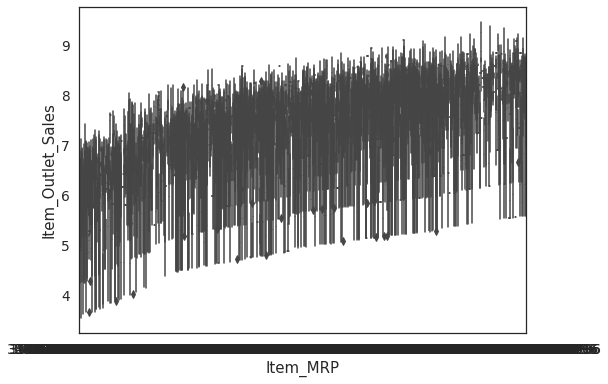

In [18]:
data = pd.concat([train_data['Item_Outlet_Sales'], train_data['Item_MRP']], axis = 1)
f,ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x="Item_MRP", y="Item_Outlet_Sales", data = data)

#data = pd.concat([train_data['Item_Outlet_Sales'], train_data['Item_MRP']], axis = 1)
#f,ax = plt.subplots(figsize=(8,6))
#ax = sns.boxplot(x="Item_MRP", y="Item_Outlet_Sales", data = data)

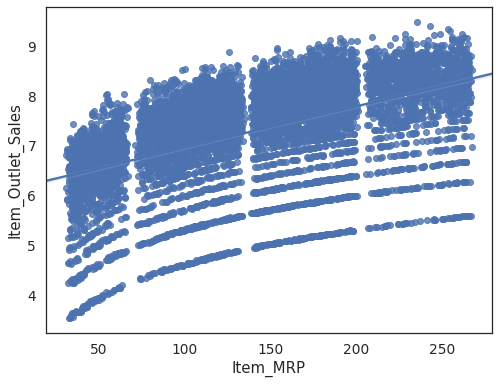

In [19]:
data = pd.concat([train_data['Item_Outlet_Sales'], train_data['Item_MRP']], axis = 1)
f,ax = plt.subplots(figsize=(8,6))
fig = sns.regplot(x="Item_MRP", y="Item_Outlet_Sales", data = data)

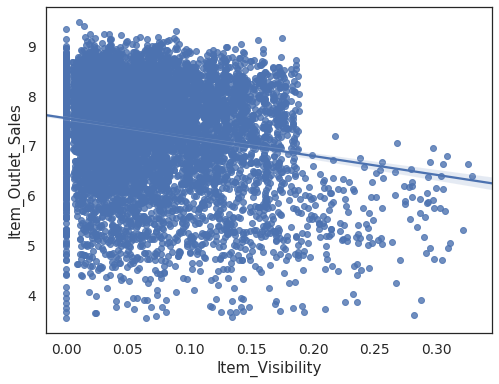

In [20]:
data = pd.concat([train_data['Item_Outlet_Sales'], train_data['Item_Visibility']], axis = 1)
f,ax = plt.subplots(figsize=(8,6))
fig = sns.regplot(x="Item_Visibility", y="Item_Outlet_Sales", data = data)

In [ ]:
data = pd.concat([train_data['Item_Outlet_Sales'], train_data['Item_Visibility']], axis = 1)
f,ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x="Item_Visibility", y="Item_Outlet_Sales", data = data)